# Working with clusterings

In [1]:
import igraph as ig
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
ig.config["plotting.backend"] = "matplotlib"

Most `igraph` clustering methods return a `VertexClustering` object:

In [2]:
g = ig.Graph.Famous("Zachary")
communities_lpa = g.community_label_propagation()
print(type(communities_lpa))

<class 'igraph.clustering.VertexClustering'>


and even if they don't, you can always access this with the `as_clustering()` method:

In [3]:
communities = g.community_fastgreedy()
print(type(communities))
communities = communities.as_clustering()
print(type(communities))

<class 'igraph.clustering.VertexDendrogram'>
<class 'igraph.clustering.VertexClustering'>


### Getting a usable list of groups
The `VertexClustering` object provides a `membership` list, which is a vector of numbers (e.g., `[0, 0, 1, 1, 0, 2]`). This is great for plotting, but not always for analysis.

In [4]:
print(f"Raw membership vector: {communities_lpa.membership}")

communities_as_lists = communities_lpa.as_cover()

print("\nCommunities converted to a list of lists:")
print(communities_as_lists)

Raw membership vector: [0, 1, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3]

Communities converted to a list of lists:
Cover with 4 clusters
[0] 0, 4, 5, 6, 10, 11, 12, 16, 17
[1] 1, 2, 3, 7, 9, 13, 19, 21
[2] 8, 14, 15, 18, 20, 30, 32
[3] 22, 23, 24, 25, 26, 27, 28, 29, 31, 33


### Analyzing the properties of each community
We have the communities, but now you need to understand their characteristics. For example, which community is the largest? Which has the most connections?

In [5]:
for i, community_nodes in enumerate(communities_as_lists):
    # Get a subgraph for this community.
    community_subgraph = g.induced_subgraph(community_nodes)
    
    num_nodes = community_subgraph.vcount()
    num_edges = community_subgraph.ecount()
    
    if num_nodes > 0:
        avg_degree = (2 * num_edges) / num_nodes
    else:
        avg_degree = 0

    print(f"Community {i+1}:")
    print(f"  - Size: {num_nodes} nodes")
    print(f"  - Number of internal edges: {num_edges}")
    print(f"  - Average degree (within community): {avg_degree:.2f}")

Community 1:
  - Size: 9 nodes
  - Number of internal edges: 13
  - Average degree (within community): 2.89
Community 2:
  - Size: 8 nodes
  - Number of internal edges: 12
  - Average degree (within community): 3.00
Community 3:
  - Size: 7 nodes
  - Number of internal edges: 7
  - Average degree (within community): 2.00
Community 4:
  - Size: 10 nodes
  - Number of internal edges: 16
  - Average degree (within community): 3.20


### Comparing community partitions
We've run multiple algorithms (e.g., Fast Greedy and Label Propagation) or want to compare our result to a known "ground truth." How do we quantify the similarity between two different partitions?

In [6]:
print(f"Label Propagation found {len(communities_lpa)} communities.")
print(f"Fast Greedy algorithm found {len(communities)} communities.")

Label Propagation found 4 communities.
Fast Greedy algorithm found 3 communities.


In [7]:
nmi_score = ig.compare_communities(communities_lpa.membership, communities.membership, method='nmi')

print(f"\nNormalized Mutual Information (NMI) score between the two clusterings: {nmi_score:.4f}")
print(f"  (A score of 1.0 means the partitions are identical)")



Normalized Mutual Information (NMI) score between the two clusterings: 0.6704
  (A score of 1.0 means the partitions are identical)


### Visualizing and evaluating a partition
We need a quick visual check and a quantitative measure of your partition's quality.

The modularity score of the Label Propagation clustering is: 0.3568


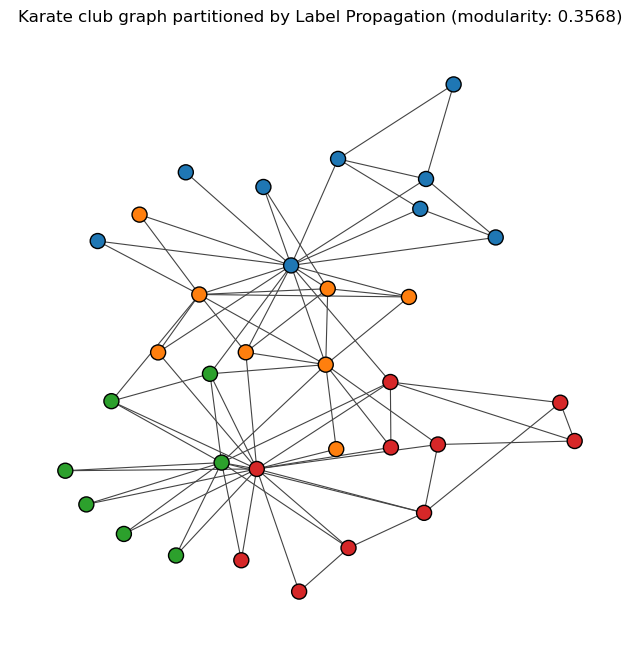

In [8]:
modularity_score = communities_lpa.modularity
print(f"The modularity score of the Label Propagation clustering is: {modularity_score:.4f}")

community_colors = matplotlib.colormaps["tab10"]
node_colors = [community_colors(membership_id) for membership_id in communities_lpa.membership]


fig, ax = plt.subplots(figsize=(8, 8))
ig.plot(
    g,
    target=ax,
    vertex_color=node_colors,
    vertex_size=15,
    edge_width=0.8,
    layout=g.layout_kamada_kawai(),
)

ax.set_title(f"Karate club graph partitioned by Label Propagation (modularity: {modularity_score:.4f})")
plt.show()

<div style="background-color: #e6ffe6; padding: 20px; border-radius: 5px;">
    
_Note:_ You can find a more detailed explanation of **modularity** [here](./modularity.ipynb).

_Note:_ You can find more **visualization techniques** [here](./generating_and_visualizing_clusters.ipynb).

</div>